In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import numpy as np 

In [2]:
# Загрузка текста
import pandas as pd 
texts = pd.read_excel("texts_cluster.xlsx")
texts.head(5)

,Raw,Processed
0,Отпуск 2020. Крым. Судак. Новый Свет. Феодосия.,отпуск 2020 крым судак новый свет феодосий
1,Г-гордость❣️ я очень довольна результатом. Оче...,год гордость очень довольный результат очень д...
2,"Лето, август, отпуск, но не у меня. В период...",лето август отпуск не_у период отпуск добавлят...
3,"Отпуск-2020. Никакого Лазурного берега, сплошн...",отпуск 2020 никакой лазурный берег сплошной ру...
4,Мой отпуск на море\n#бугазскаякоса #море #солц...,отпуск мор бугазскаякос мор солца отпуск отдых...


In [3]:
text = list(texts.Processed)
text_raw = list(texts.Raw)

In [4]:
# from sklearn.feature_extraction.text import CountVectorizer
# def lemma_tokenizer(text):
#     standard_tokenizer = CountVectorizer().build_tokenizer()
#     tokens = standard_tokenizer(text)
#     lemmatizer = nltk.stem.WordNetLemmatizer()
#     lemma_tokens=[]
#     for token in tokens:
#         if re.search('[a-zA-Z]', token): 
#             lemma_tokens.append(lemmatizer.lemmatize(token))
#     return lemma_tokens

в TfidfVectorizer() выстави max_df не числом документов, а долей от общего числа, например 0.75 
в TruncatedSVD() подбирай размерность матрицы (n_components) так, чтобы объясняемая дисперсия была около 0.8. Это можно проверять с помощью метода svd.explained_variance_ratio_.sum()

In [4]:
# tf-idf 
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk 
import re 

# выберем н-граммы до 3 слов 
vectorizer_3 = TfidfVectorizer(min_df=5, max_df = 0.75, ngram_range=(1,3)) 
vectorizer = TfidfVectorizer(max_df = 0.75, min_df = 5)

# фитим векторайзер к документам 
matrix_3 = vectorizer_3.fit_transform(text)
matrix = vectorizer.fit_transform(text)

In [5]:
matrix.shape

(33183, 13954)

In [ ]:
terms = vectorizer.get_feature_names()

In [ ]:
print(terms[:2000])

['000', '08_10', '08_14', '100', '1000', '101', '107', '110', '1100', '112', '113', '120', '1200', '121', '123', '1234', '124', '125', '130', '140', '1400', '150', '1500', '156', '160', '1600', '170', '180', '1800', '190', '1900', '1940', '1942', '1991', '1го', '200', '2000', '2002', '2003', '2004', '2005', '2006', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2019г', '2020', '2020г', '2020год', '2021', '2022', '2200', '2320', '250', '2500', '2700', '280', '2800', '2кг', '2ой', '300', '3000', '30тысяча', '3200', '333', '350', '3500', '360', '365', '3го', '3год', '400', '4000', '407', '421', '450', '4500', '500', '5000', '5кг', '600', '6000', '6500', '700', '7000', '800', '888', '900', '903', '906', '911', '914', '916', '923', '928', '92днялето', '931', '932', '953', '981', '_края', 'about', 'act', 'adler', 'adventure', 'aesthetic', 'after', 'air', 'airbnb', 'airlines', 'airtouch', 'alex', 'all', 'altay', 'amazing', 'anapa', 'anapa2020'

In [ ]:
# feature_array = np.array(terms)
# a = np.argsort(matrix.toarray())
# tf_idf_sorting = a.flatten()[::-1]
# n = 30 
# top_n = feature_array[tf_idf_sorting][:n]
# print(top_n)

In [ ]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import time

svd = TruncatedSVD(n_components = 2000)
features = svd.fit_transform(matrix)

num_clusters = range(1,20)
KM = []

for k in num_clusters:
  t0 = time.time() 
  fit_pred = KMeans(n_clusters=k).fit(features)
  KM.append(fit_pred)
  t1 = time.time()
  times = t1 - t0 
  print(times)
  print("{k} cluster num is calculated".format(k = k))
  explained_variance = svd.explained_variance_ratio_.sum()
  print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

7.276343584060669
1 cluster num is calculated
Explained variance of the SVD step: 86%
44.34646201133728
2 cluster num is calculated
Explained variance of the SVD step: 86%
48.20662784576416
3 cluster num is calculated
Explained variance of the SVD step: 86%
58.9960720539093
4 cluster num is calculated
Explained variance of the SVD step: 86%
67.66206526756287
5 cluster num is calculated
Explained variance of the SVD step: 86%
72.38622760772705
6 cluster num is calculated
Explained variance of the SVD step: 86%
115.90700888633728
7 cluster num is calculated
Explained variance of the SVD step: 86%
132.10672616958618
8 cluster num is calculated
Explained variance of the SVD step: 86%
126.09347128868103
9 cluster num is calculated
Explained variance of the SVD step: 86%
118.47537016868591
10 cluster num is calculated
Explained variance of the SVD step: 86%
130.96696877479553
11 cluster num is calculated
Explained variance of the SVD step: 86%
145.17250967025757
12 cluster num is calculated


In [ ]:
centroids = [k.cluster_centers_ for k in KM] 

In [ ]:
centroids[0].shape

(1, 2000)

Text(0.5, 1.0, 'Elbow for KMeans clustering')

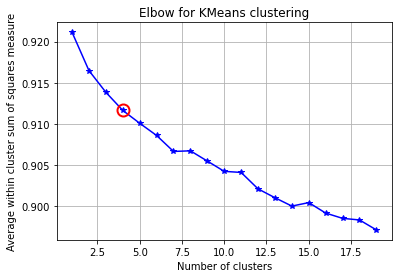

In [ ]:
%matplotlib inline
from scipy.spatial.distance import cdist

D_k = [cdist(features, cent,'euclidean') for cent in centroids]  #euclidean as a distance measure
eucldist = [np.min(D,axis=1) for D in D_k]  #find minimum distance
avgWithinSM = [sum(d)/matrix.shape[0] for d in eucldist]
kIdx = 3 
# plot elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(num_clusters, avgWithinSM, 'b*-')
ax.plot(num_clusters[kIdx], avgWithinSM[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within cluster sum of squares measure')
plt.title('Elbow for KMeans clustering')

In [8]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 2000)
features = svd.fit_transform(matrix)

from sklearn.cluster import KMeans
best_K=4

model = KMeans(best_K)  
model.fit(features)  
clusters = model.labels_.tolist()
#create dictionary of docs and cluster
news = {'docs': text,'cluster': clusters}  
frame = pd.DataFrame(news, index = [clusters] , columns = ['cluster'])  

In [ ]:
print('Number of documents per cluster')
frame['cluster'].value_counts()   

Number of documents per cluster


1    19182
3     5616
0     5520
2     2865
Name: cluster, dtype: int64

In [ ]:
text_tokens = []
for i in text: 
  tokens = i.split()
  for t in tokens: 
    text_tokens.append(t)

vocab_frame = pd.DataFrame({'words': text_tokens}, index = text_tokens)

In [ ]:
vocab_frame.head()

,words
отпуск,отпуск
2020,2020
крым,крым
судак,судак
новый,новый


In [ ]:
cluster_cen = model.cluster_centers_
cluster_cen

array([[ 1.54257022e-01,  2.00501468e-01,  4.89265065e-03, ...,
         1.21650547e-04, -4.08624024e-05, -1.44322404e-04],
       [ 1.17916284e-01, -3.55358960e-02, -3.56722605e-02, ...,
        -5.38294754e-05, -1.19570240e-05, -5.36531019e-05],
       [ 1.10501121e-01, -3.95662701e-02, -1.38491983e-01, ...,
         1.49057800e-05, -6.76524226e-05, -1.75914882e-04],
       [ 1.89350215e-01, -7.82257755e-02,  1.12916285e-01, ...,
         4.49616580e-05,  8.54753281e-05,  9.04280275e-05]])

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :25]:
        print(' %s' % terms[ind], end='')
        print()

#  Это все не очень интерпретируется, но можно попробовать 

Top terms per cluster:
Cluster 0: 100
 000
 1000
 500
 beach
 2017
 gif
 friends
 black
 smile
 like
 like4like
 girl
 relax
 активный
 2021
 liketime
 summer
 like4likes
 sky
 sport
 photo
 баловать
 photooftheday
 автопутешествие
Cluster 1: 000
 200
 2019
 2021
 covid
 instagood
 black
 beach
 акция
 андрей
 live
 this
 актуальный
 анапа2020
 анна
 2000
 алексей
 spb
 good
 saintpetersburg
 август
 beauty
 russia
 nature
 бали
Cluster 2: 150
 000
 2017
 2018
 2019
 august
 flowers
 blacksea
 moscow
 girls
 art
 july
 smile
 holidays
 insta
 holiday
 абхазия
 follow
 mood
 relax
 авиабилет
 what
 акварель
 liketime
 life
Cluster 3: 000
 1000
 150
 2017
 2000
 300
 2018
 good
 2020
 beautiful
 foto
 beauty
 follow
 this
 vacation
 beach
 sky
 аэропорт
 автобус
 moscow
 nature
 goodday
 direct
 арт
 july


In [9]:
from sklearn.decomposition import PCA
import pylab as pl
pca = PCA(n_components=2).fit(features)  
data2D = pca.transform(features) 

In [10]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

CPU times: user 24min 50s, sys: 32 s, total: 25min 22s
Wall time: 25min 23s


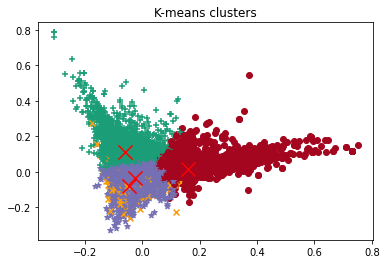

In [11]:
%%time 
import matplotlib.pyplot as plt 

for i in range(0, data2D.shape[0]):  
    if model.labels_[i] == 1:
        c1 = plt.scatter(data2D[i,0],data2D[i,1],c='#1b9e77', marker='+')
    elif model.labels_[i] == 0:
        c2 = plt.scatter(data2D[i,0],data2D[i,1],c='#a3061e',marker='o')
    elif model.labels_[i] == 2:
        c3 = plt.scatter(data2D[i,0],data2D[i,1],c='#7570b3',marker='*')
    elif model.labels_[i] == 3:
        c4 = plt.scatter(data2D[i,0],data2D[i,1],c='#f99d0c',marker='x')
pl.title('K-means clusters')
    
centers2D = pca.transform(model.cluster_centers_)   
plt.scatter(centers2D[:,0], centers2D[:,1], 
           marker='x', s=200, linewidths=3, c='r')

In [ ]:
# SVD + Kmeans 
%%time
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 100)
features = svd.fit_transform(matrix)
preds_svd_kmeans = model.fit_predict(features)

print(svd.explained_variance_ratio_.sum())

0.1626631522059459
CPU times: user 7.43 s, sys: 2.62 s, total: 10 s
Wall time: 6.44 s


In [ ]:
%%time
svd = TruncatedSVD(n_components = 200)
features = svd.fit_transform(matrix)
preds_svd_kmeans = model.fit_predict(features)

print(svd.explained_variance_ratio_.sum())

0.23678575461952522
CPU times: user 14.6 s, sys: 3.3 s, total: 17.9 s
Wall time: 12.6 s


In [ ]:
%%time
svd = TruncatedSVD(n_components = 1000)
features = svd.fit_transform(matrix)
preds_svd_kmeans = model.fit_predict(features)

print(svd.explained_variance_ratio_.sum())
# print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

0.5055023769458565
CPU times: user 1min 31s, sys: 7.58 s, total: 1min 39s
Wall time: 1min 9s


In [ ]:
%%time
svd = TruncatedSVD(n_components = 2500)
features = svd.fit_transform(matrix)
preds_svd_kmeans = model.fit_predict(features)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 71%
CPU times: user 6min 44s, sys: 13.3 s, total: 6min 57s
Wall time: 4min 40s


In [ ]:
%%time
svd = TruncatedSVD(n_components = 3000)
features = svd.fit_transform(matrix)
preds_svd_kmeans = model.fit_predict(features)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 75%
CPU times: user 8min 26s, sys: 17.2 s, total: 8min 43s
Wall time: 5min 29s


In [ ]:
%%time
svd = TruncatedSVD(n_components = 4500)
features = svd.fit_transform(matrix)
preds_svd_kmeans = model.fit_predict(features)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 84%
CPU times: user 17min 50s, sys: 25 s, total: 18min 16s
Wall time: 11min


In [12]:
preds_svd_kmeans = model.fit_predict(features)
text_preds = pd.DataFrame(preds_svd_kmeans)
text_preds["texts"] = text
text_preds["texts_raw"] = text_raw
text_preds.head(20)

,0,texts,texts_raw
0,3,отпуск 2020 крым судак новый свет феодосий,Отпуск 2020. Крым. Судак. Новый Свет. Феодосия.
1,0,год гордость очень довольный результат очень д...,Г-гордость❣️ я очень довольна результатом. Оче...
2,0,лето август отпуск не_у период отпуск добавлят...,"Лето, август, отпуск, но не у меня. В период..."
3,3,отпуск 2020 никакой лазурный берег сплошной ру...,"Отпуск-2020. Никакого Лазурного берега, сплошн..."
4,3,отпуск мор бугазскаякос мор солца отпуск отдых...,Мой отпуск на море\n#бугазскаякоса #море #солц...
5,2,люба непонятный ситуация едь питер отпуск это ...,В любой непонятной ситуации - едь в Питер. \n\...
6,0,фотка чисто посмеяться первое погружение аквал...,А теперь фотки чисто посмеяться Моё первое по...
7,2,закончиться отпуск окно подоконник стучать неи...,Вот и закончился мой отпуск. \n\nЗа окном по п...
8,0,отпуск прошлый большой месяц это время максиму...,С моего отпуска прошло чуть больше месяца и во...
9,0,отдыхать не_работать поэтому отпуск семья нача...,Отдыхать - не работать \nПоэтому мой отпуск мы...


In [13]:
text_preds.to_csv("text_preds_kmeans_svd_2.csv")

Итак, теперь сравним разные методы кластеризации.


In [6]:
diff_clust = pd.DataFrame(columns = ['Run time', 'Within-cluster sum of squares(inertia)', 'Silhouette score', 'Number of clusters'])
diff_clust.head()

,Run time,Within-cluster sum of squares(inertia),Silhouette score,Number of clusters


In [7]:
params = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 4}

In [8]:
pip install sklearn_extensions

Note: you may need to restart the kernel to use updated packages.


In [8]:
import time
from sklearn.cluster import KMeans
from sklearn import cluster, mixture

In [9]:
kmeans = cluster.KMeans(n_clusters=params['n_clusters'], random_state=42)

In [10]:
two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward')
spectral = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack', affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=params['eps'])
affinity_propagation = cluster.AffinityPropagation(damping=params['damping'], preference=params['preference'])
average_linkage = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock", n_clusters=params['n_clusters'])
birch = cluster.Birch(n_clusters=params['n_clusters'])
gmm = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')

In [11]:
names_methods = (
        ('KMeans', kmeans),
        ('MiniBatchKMeans', two_means),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

In [12]:
from sklearn.decomposition import TruncatedSVD
from collections import defaultdict
from sklearn.metrics import silhouette_score, silhouette_samples

In [13]:
results = defaultdict(list)
print(results)

# preds_m_keys = ['KMeans', 'kMedians', 'fuzzy KMeans', 'MiniBatchKMeans', 
#                 'Ward', 'AgglomerativeClustering', 'DBSCAN', 'Birch', 
#                 'GaussianMixture']
# preds_models = {key: None for key in preds_m_keys}
# print(preds_models)

defaultdict(<class 'list'>, {})


In [20]:
preds_all = []
for name, method in names_methods[3:5]: 
    t0 = time.time()
    svd = TruncatedSVD(n_components = 2500)
    features = svd.fit_transform(matrix)
    
    preds = method.fit_predict(features)
    t1 = time.time()

    results[name].append(t1-t0)
    results[name].append(preds)
    preds_all.append(preds)
    
    print("Predicted values are added ... ")

    if name == 'KMeans' or name == 'MiniBatchKMeans':
        inertia = method.inertia_
    else:
        inertia = 'N/A'
    results[name].append(inertia)      

    if name == 'GaussianMixture':
        labels = method.predict(X)
    else:
        labels = method.labels_
        score = silhouette_score(matrix, labels, metric='euclidean', sample_size=3000)
    results[name].append(score)
  
    if name == 'MeanShift':
        labels_unique = np.unique(labels)
        K = len(labels_unique)     
    elif name == 'DBSCAN':
        K = len(set(labels)) - (1 if -1 in labels else 0)
    else:
        K = params['n_clusters'] 
    results[name].append(K)
    
    print(name + " IS DONE!!")
    
    results_df = pd.DataFrame(results)
    results_df.to_csv("results_df.csv")

Predicted values are added ... 
AgglomerativeClustering IS DONE!!
Predicted values are added ... 
DBSCAN IS DONE!!


In [22]:
results_df

,KMeans,MiniBatchKMeans,Ward,AgglomerativeClustering,DBSCAN
0,395.859,239.005,3499.02,3305.16,14475.5
1,"[3, 1, 1, 3, 3, 2, 1, 2, 1, 1, 3, 2, 1, 1, 1, ...","[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, ...","[2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
2,22865.4,23194.1,N/A,N/A,N/A
3,0.00525916,0.000292784,0.00226164,0.00416321,-0.0324436
4,4,4,4,4,45


In [34]:
results_df_MiniBatchKMeans = pd.DataFrame(list(results_df.MiniBatchKMeans[1]))
results_df_MiniBatchKMeans["texts"] = text
results_df_MiniBatchKMeans["texts_raw"] = text_raw
results_df_MiniBatchKMeans.head(20)
results_df_MiniBatchKMeans.to_csv("results_df_MiniBatchKMeans.csv")

In [35]:
results_df_KMeans = pd.DataFrame(list(results_df.KMeans[1]))
results_df_KMeans["texts"] = text
results_df_KMeans["texts_raw"] = text_raw
results_df_KMeans.head(20)
results_df_KMeans.to_csv("results_df_KMeans.csv")

In [36]:
results_df_AgglomerativeClustering = pd.DataFrame(list(results_df.AgglomerativeClustering[1]))
results_df_AgglomerativeClustering["texts"] = text
results_df_AgglomerativeClustering["texts_raw"] = text_raw
results_df_AgglomerativeClustering.head(20)
results_df_AgglomerativeClustering.to_csv("results_df_AgglomerativeClustering.csv")

In [38]:
results_df_DBSCAN = pd.DataFrame(list(results_df.DBSCAN[1]))
results_df_DBSCAN["texts"] = text
results_df_DBSCAN["texts_raw"] = text_raw
results_df_DBSCAN.head(20)
results_df_DBSCAN.to_csv("results_df_DBSCAN.csv")